In [42]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

%matplotlib inline

In [3]:
schema = pd.read_csv('data/zillow_data_dictionary.csv')
schema

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


## data import

In [78]:
# import urllib.request
# # Download the file from `url` and save it locally under :
# urllib.request.urlretrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", "crx.csv")
df = pd.read_csv('data/properties_2016.csv')


In [79]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [80]:
len(df)

2985217

In [81]:
df = df.fillna(0)

## Clean and fill in missing data, combine categories based on data analysis.

## Modeling

In [82]:
from sklearn import preprocessing
# NORMALIZE CATEGORY VARIABLES
##LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines.

str_var_list = [var[0] for var in df.dtypes.iteritems() if var[1]==object]
features = str_var_list
  
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
    

In [83]:
df[:10000].describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.0,1.000000e+04,1.000000e+04,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,1.252635e+07,0.285100,0.0,0.427600,2.138000,3.067800,0.023000,5.138500,2.138000,0.488400,...,0.125500,0.0,1.568337e+05,3.848392e+05,2014.99930,2.280055e+05,5014.856645,0.024400,0.337800,5.865112e+13
std,3.205307e+06,0.515989,0.0,16.126666,1.124025,1.314449,0.296108,2.567134,1.124025,5.656772,...,0.423282,0.0,2.751060e+05,6.726217e+05,0.02645,4.482753e+05,8291.334925,0.154295,2.151593,1.026405e+13
min,1.071722e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,2014.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,1.145617e+07,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.0,6.825000e+04,1.544430e+05,2015.00000,5.875525e+04,2225.877500,0.000000,0.000000,6.037238e+13
50%,1.211654e+07,0.000000,0.0,0.000000,2.000000,3.000000,0.000000,7.000000,2.000000,0.000000,...,0.000000,0.0,1.139575e+05,2.743480e+05,2015.00000,1.453885e+05,3678.545000,0.000000,0.000000,6.037480e+13
75%,1.271271e+07,1.000000,0.0,0.000000,3.000000,4.000000,0.000000,7.000000,3.000000,0.000000,...,0.000000,0.0,1.816888e+05,4.389768e+05,2015.00000,2.719475e+05,5708.870000,0.000000,0.000000,6.037604e+13
max,1.631873e+08,13.000000,0.0,782.000000,12.000000,12.000000,5.000000,12.000000,12.000000,66.000000,...,4.000000,0.0,1.311502e+07,2.971371e+07,2015.00000,2.210127e+07,362406.910000,1.000000,15.000000,6.111009e+13


In [84]:
df_err = pd.read_csv('data/train_2016_v2.csv')
len(df_err)
df_err.head()


df_train = df.merge(df_err,how='inner',on=['parcelid'])
len(df_train)
df_train.head()

df_train['transactionmonth'] = df_train['transactiondate'].map(lambda x: x.split('-')[1])



In [85]:
df_train.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,...,90275.000000,9.027500e+04,9.027500e+04,90275.0,9.027500e+04,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000
mean,1.298466e+07,0.579086,0.020903,0.339895,2.279474,3.031869,0.000709,3.536461,2.278981,0.481063,...,0.002459,1.793353e+05,4.576676e+05,2015.0,2.783322e+05,5983.578210,0.019751,0.264713,6.008611e+13,0.011457
std,2.504510e+06,1.880576,0.414654,18.205899,1.004271,1.156436,0.053248,3.077455,1.004660,5.614189,...,0.049529,2.090147e+05,5.548834e+05,0.0,4.004943e+05,6838.823676,0.139143,1.903536,4.939707e+12,0.161079
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,2015.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-4.605000
25%,1.155950e+07,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,8.064100e+04,1.990125e+05,2015.0,8.222750e+04,2872.470000,0.000000,0.000000,6.037311e+13,-0.025300
50%,1.254734e+07,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,4.000000,2.000000,0.000000,...,0.000000,1.315070e+05,3.428720e+05,2015.0,1.929600e+05,4542.440000,0.000000,0.000000,6.037603e+13,0.006000
75%,1.422755e+07,1.000000,0.000000,0.000000,3.000000,4.000000,0.000000,7.000000,3.000000,0.000000,...,0.000000,2.100425e+05,5.405890e+05,2015.0,3.454150e+05,6900.600000,0.000000,0.000000,6.059042e+13,0.039200
max,1.629608e+08,13.000000,21.000000,1555.000000,20.000000,16.000000,4.000000,12.000000,20.000000,66.000000,...,1.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,1.000000,99.000000,6.111009e+13,4.737000


In [96]:

#First, separate the features(X) from the labels(y).
#X_all: All features minus the value we want to predict (Survived).
#y_all: Only the value we want to predict.

#Second, use Scikit-learn to randomly shuffle this data into four variables. 
#Here training 80% of the data, then testing against the other 20%.
from sklearn.model_selection import train_test_split

X = df_train.drop(['parcelid','transactiondate','logerror'],axis=1)
y = df_train['logerror']



num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=1)

In [87]:
np.mean(y_test)

0.013520138465798949

## Random Forrest Model

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,mean_squared_error

# Choose the type of classifier. 
model = RandomForestRegressor()

# # Choose some parameter combinations to try
# parameters = {'n_estimators': [200], 
#               'max_features': ['auto'], 
#               'max_depth': [60],
#               'min_samples_split': [2],
#               'min_samples_leaf': [80],
#               'n_jobs':[-1]
#              }

# test_mse= 0.0263986446992
parameters = {'n_estimators': [200], 
              'max_features': ['auto'], 
              'max_depth': [60],
              'min_samples_split': [2],
              'min_samples_leaf': [80],
              'n_jobs':[-1]
             }

# # test_mse= 0.0264165704676
# parameters = {'n_estimators': [100], 
#               'max_features': ['auto'], 
#               'max_depth': [40], 
#               'min_samples_split': [2],
#               'min_samples_leaf': [80],
#               'n_jobs':[-1]
#              }

# # test_mse= 0.02643
# parameters = {'n_estimators': [100], 
#               'max_features': ['auto'], 
#               'max_depth': [30],
#               'min_samples_split': [2],
#               'min_samples_leaf': [40],
#               'n_jobs':[-1]
#              }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error)

# Run the grid search
# read theory
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X_train, y_train)

# Get model performance
p_train = model.predict(X_train)
p_test = model.predict(X_test)

print 'train_mse=',mean_squared_error(y_train, p_train)
print 'test_mse=',mean_squared_error(y_test, p_test)

train_mse= 0.0239209527427
test_mse= 0.0263986446992


0.16361574739
0.162476597389


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b197550>]], dtype=object)

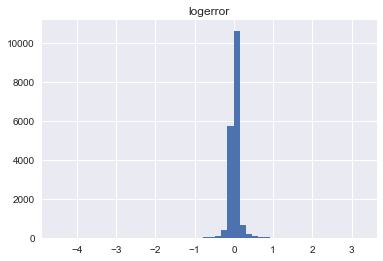

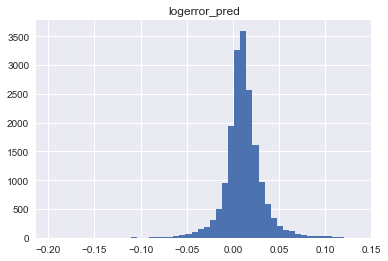

In [109]:
print np.std(y_test)
print np.sqrt(mean_squared_error(y_test, p_test))
pd.DataFrame(y_test).hist(bins=50)
pd.DataFrame({'logerror_pred':p_test}).hist(bins=50)

In [ ]:
# feature importance
sorted(zip(X_all.columns.values,model.feature_importances_), key=lambda x: x[1],reverse=True)

In [110]:
# Train for submission

# Fit the best algorithm to the data. 
model.fit(X, y)

# Get model performance
p = model.predict(X)

print 'final_mse=',mean_squared_error(y, p)

final_mse= 0.0241088203989


In [111]:
df_res = pd.DataFrame()
df_res['ParcelId'] = df['parcelid']
transactiondate_list = ['2016-10','2016-11','2016-12','2017-10','2017-11','2017-12']

for i,transactiondate in enumerate(transactiondate_list):
    print 'Scoring for date:', transactiondate
    transactiondate_var_list.append('transactiondate_'+str(i))
    df['transactiondate'] = transactiondate
    df['transactionmonth'] = df['transactiondate'].map(lambda x: x.split('-')[1])
    X_all = df.drop(['parcelid','transactiondate'],axis=1)
    p_all = model.predict(X_all)
    df_res[transactiondate.replace('-','')] = p_all

In [112]:
df_res.head()
df_res.to_csv('data/my_submission.csv.gz',index=False,compression='gzip')

## GBDT

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,mean_squared_error

# Choose the type of classifier. 
model = GradientBoostingRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [200], 
              'learning_rate': [0.01], 
              'max_depth': [6],
              'min_samples_split': [2],
              'min_samples_leaf': [80]
             }

# # test_mse= 0.0264165704676
# parameters = {'n_estimators': [100], 
#               'max_features': ['auto'], 
#               'max_depth': [40], 
#               'min_samples_split': [2],
#               'min_samples_leaf': [80],
#               'n_jobs':[-1]
#              }

# # test_mse= 0.02643
# parameters = {'n_estimators': [100], 
#               'max_features': ['auto'], 
#               'max_depth': [30],
#               'min_samples_split': [2],
#               'min_samples_leaf': [40],
#               'n_jobs':[-1]
#              }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error)

# Run the grid search
# read theory
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X_train, y_train)

# Get model performance
p_train = model.predict(X_train)
p_test = model.predict(X_test)

print 'train_mse=',mean_squared_error(y_train, p_train)
print 'test_mse=',mean_squared_error(y_test, p_test)

train_mse= 0.0247785168781
test_mse= 0.0265303299749


In [49]:
df_sub = pd.read_csv('data/sample_submission.csv')


In [50]:
df_sub.columns

Index([u'ParcelId', u'201610', u'201611', u'201612', u'201710', u'201711',
       u'201712'],
      dtype='object')

In [171]:
len(df)

2985217